### 피쳐 스케일링 수행

수치형 데이터들의 경우 평균연봉과 'pros_encoded' 피쳐를 제외하고 값의 크기와 분산이 상당히 큰 편이다.  
예를 들어, 기업 연매출 'sales' 값은 약 1.2 * 10^8 (만원) 이 최댓값이다, 평균과 분위값들을 봤을 때 아웃라이어 값임이 명백하다.  

하지만 상식적으로 기업들의 연매출과 자본금에 차이가 매우 클 수도 있음은 당연하며, 오히려 'sales' 값이 매우 큰 경우 대기업-중견기업 쪽에 속하기 때문에 아웃라이어 값임에도 어느 정도 필요한 정보를 잠재적으로 가지고 있다고 보았다. 

따라서 아웃라이어를 포함한 전체 데이터에 아웃라이어에 강한 Robust Scaling 을 적용하여 피쳐 스케일링을 수행하였다.  
로그 변환은 변환 수행 이전 이후 데이터 분포가 달라짐을 감안하여 최종 버전에서는 수행하지 않았다.  

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [26]:
df = pd.read_csv('data_beforeScaling.csv', encoding='utf-8-sig', index_col=0)
print(df.dtypes)
print()
print(df.columns[:])
print()
print(df.describe())

region            int64
education         int64
jobtype           int64
cptype            int64
sales           float64
employees       float64
aversalary      float64
capital         float64
pros_encoded    float64
dtype: object

Index(['region', 'education', 'jobtype', 'cptype', 'sales', 'employees',
       'aversalary', 'capital', 'pros_encoded'],
      dtype='object')

            region    education      jobtype       cptype         sales  \
count  3015.000000  3015.000000  3015.000000  3015.000000  2.253000e+03   
mean      0.764842     0.836153     0.482587     0.670315  3.576065e+06   
std       0.808932     1.170736     0.499780     0.817098  9.453942e+06   
min       0.000000     0.000000     0.000000     0.000000  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  5.941000e+03   
50%       1.000000     0.000000     0.000000     0.000000  1.542990e+05   
75%       1.000000     2.000000     1.000000     1.000000  1.191101e+06   
max       2.000000     5

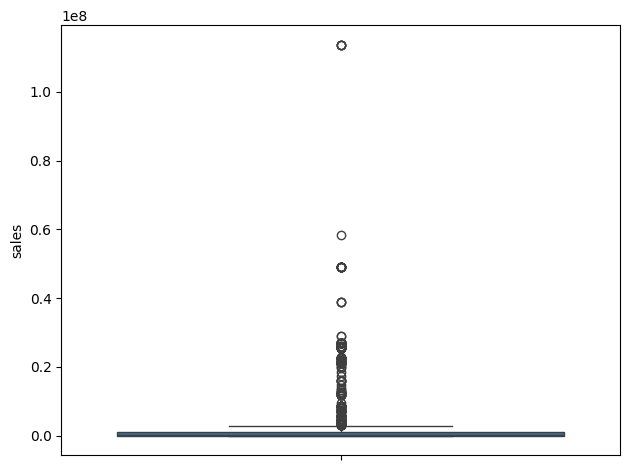

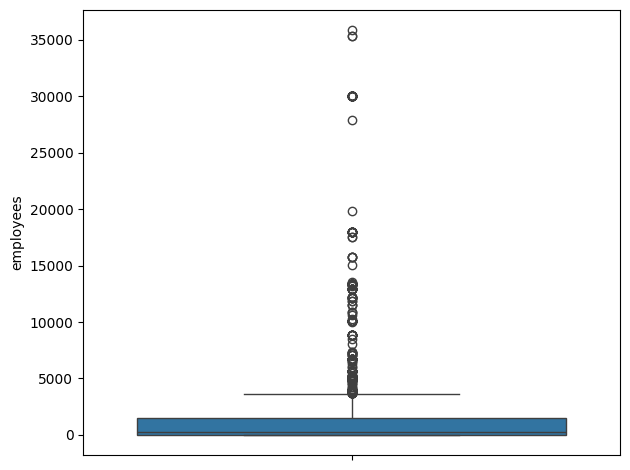

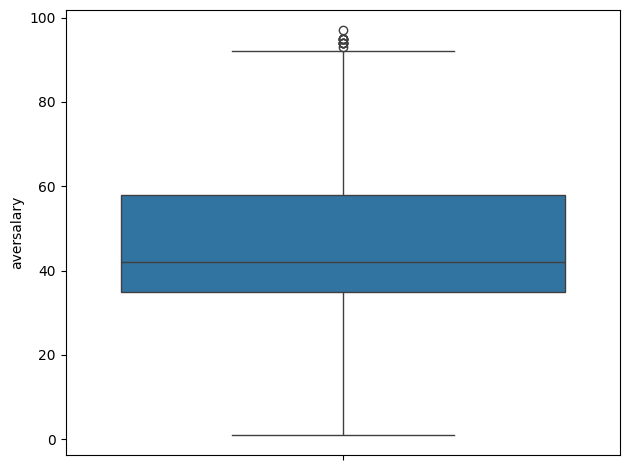

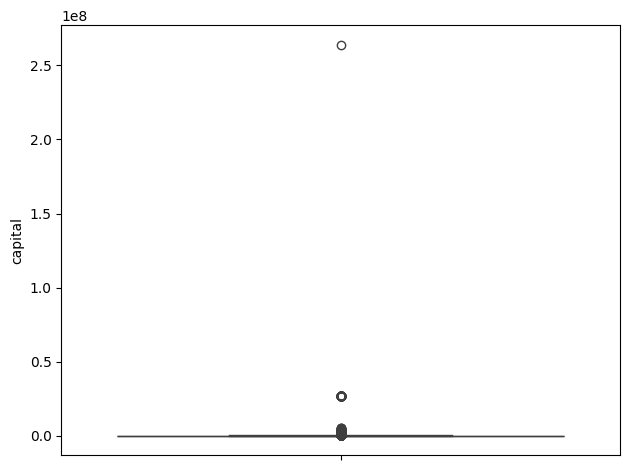

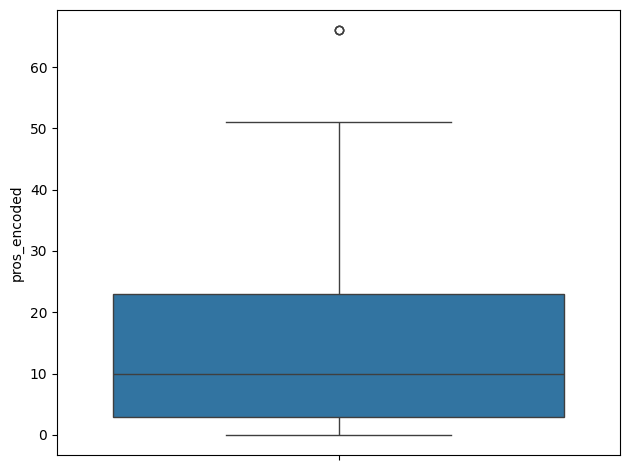

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['sales', 'employees','aversalary', 'capital', 'pros_encoded']

for col in numerical_cols:
    # sns.boxenplot(df[col])
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [28]:
# 최종적으로 채택되지는 않은 스케일링 방식
# scaler = StandardScaler()

# df.loc[:, 'sales': 'pros_encoded'] = scaler.fit_transform(df.loc[:, 'sales': 'pros_encoded'])
# df = df.round(4)

In [29]:
# 최종적으로 채택되지는 않은 스케일링 방식
# scaler = MinMaxScaler()

# df.loc[:, 'sales': 'pros_encoded'] = scaler.fit_transform(df.loc[:, 'sales': 'pros_encoded'])
# df = df.round(4)

In [30]:
# 최종적으로 채택
scaler = RobustScaler()

df.loc[:, 'sales': 'pros_encoded'] = scaler.fit_transform(df.loc[:, 'sales': 'pros_encoded'])
df = df.round(4)

print(df.describe())

            region    education      jobtype       cptype        sales  \
count  3015.000000  3015.000000  3015.000000  3015.000000  2253.000000   
mean      0.764842     0.836153     0.482587     0.670315     2.887175   
std       0.808932     1.170736     0.499780     0.817098     7.976932   
min       0.000000     0.000000     0.000000     0.000000    -0.130200   
25%       0.000000     0.000000     0.000000     0.000000    -0.125200   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     2.000000     1.000000     1.000000     0.874800   
max       2.000000     5.000000     1.000000     2.000000    95.856900   

         employees   aversalary      capital  pros_encoded  
count  2482.000000  2149.000000  2303.000000   3015.000000  
mean      1.121039     0.154087    24.992462      0.153018  
std       3.190629     0.750271   162.426437      0.609906  
min      -0.209200    -1.782600    -0.113000     -0.500000  
25%      -0.187600    -0.304

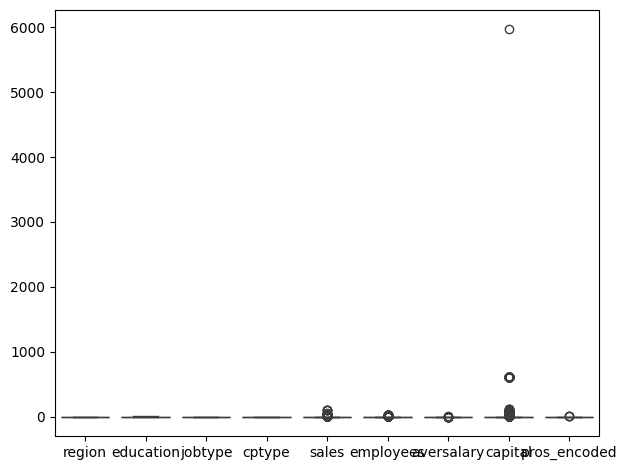

In [31]:
sns.boxplot(df)
plt.tight_layout()
plt.show()

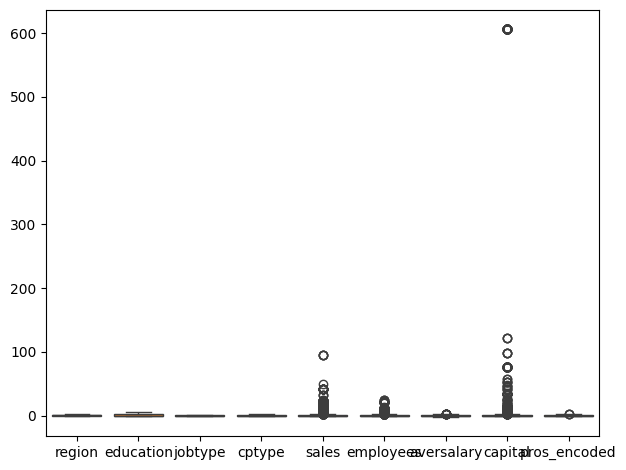

In [35]:
# 너무 극단적인 값 단 한 개 수동으로 제거
outlier = df[df['capital'] > 5000].index
df = df.drop(outlier, axis=0)

sns.boxplot(df)
plt.tight_layout()
plt.show()

In [36]:
df.to_csv('data.csv', encoding='utf-8-sig')